In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

# Task 1
dataset = [['Strawberry', 'Grapes', 'Cheese', 'Watermelon', 'Chocolate', 'Yogurt'],
           ['Salmon', 'Grapes', 'Cheese', 'Watermelon', 'Chocolate', 'Yogurt'],
           ['Strawberry', 'Apple', 'Watermelon', 'Chocolate'],
           ['Strawberry', 'Chicken', 'Grapes', 'Watermelon', 'Yogurt'],
           ['Chicken', 'Grapes', 'Salmon', 'Watermelon', 'Cherry', 'Chocolate']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)
#display(df)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
display(frequent_itemsets)

,support,itemsets,length
0,0.8,(Chocolate),1
1,0.8,(Grapes),1
2,0.6,(Strawberry),1
3,1.0,(Watermelon),1
4,0.6,(Yogurt),1
5,0.6,"(Grapes, Chocolate)",2
6,0.8,"(Watermelon, Chocolate)",2
7,0.8,"(Watermelon, Grapes)",2
8,0.6,"(Grapes, Yogurt)",2
9,0.6,"(Watermelon, Strawberry)",2


In [ ]:
from mlxtend.frequent_patterns import association_rules


strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
#display(strong_rules)
#display(frequent_itemsets)


# One rule is used from the collection of strong rules
oneRule = strong_rules.loc[6]
display(oneRule)

def k_one_rule(frequent_itemsets, oneRule):
  antecedents = oneRule.iloc[0]
  consequents = oneRule.iloc[1]
  antecedents_support = oneRule.iloc[2]
  consequents_support = oneRule.iloc[3]

  union_of_ant_and_con = consequents.union(antecedents)
  print("\nAntecedents union Consequents", union_of_ant_and_con, "\nAntecedents", antecedents, "\nConsequents", consequents,
        "\nAntecedent Support", antecedents_support, "\nConsequents Support", consequents_support)

  row_num_count = -1
  for i in frequent_itemsets['itemsets']:
    row_num_count+=1
   # Looking for corresponding itemset in frequent_itemsets and extracting once found using row number
    if ((len(i.difference(union_of_ant_and_con)) == 0) & (len(union_of_ant_and_con.difference(i)) == 0)):
      sup_AuB = frequent_itemsets['support'].iloc[row_num_count]
      sup_AuB_div_antecedents_support = sup_AuB/antecedents_support
      sup_AuB_div_consequents_support = sup_AuB/consequents_support
      addition = sup_AuB_div_antecedents_support + sup_AuB_div_consequents_support
      half_value = 0.5
      Kulczynski_measure = half_value*addition
      print("Kulczynski_measure")
      return Kulczynski_measure

print(k_one_rule(frequent_itemsets, oneRule))
'''
KM value returned by function = 0.875
Checking with method 1 (not used in function):
(0.6/2)*((1/0.8)+(1/0.6)) = 0.875

Checking with method 2:
(0.5)*[( 0.6/0.8 ) + ( 0.6 / 0.6 )] = 0.875

'''

antecedents           (Grapes)
consequents           (Yogurt)
antecedent support         0.8
consequent support         0.6
support                    0.6
confidence                0.75
lift                      1.25
leverage                  0.12
conviction                 1.6
Name: 6, dtype: object


Antecedents union Consequents frozenset({'Grapes', 'Yogurt'}) 
Antecedents frozenset({'Grapes'}) 
Consequents frozenset({'Yogurt'}) 
Antecedent Support 0.8 
Consequents Support 0.6
Kulczynski_measure
0.7499999999999999
1.0
0.6
0.875


'\nKM value returned by function = 0.875\nChecking with method 1 (not used in function): (0.6/2)*((1/0.6)+(1/1)) = 0.8 (KM)\n\nChecking with method 2:(0.5)*[( 0.6/0.8 ) + ( 0.6 / 1 )] = 0.8 (KM)\n\nMethod 1: \nkulc(A, B) = (sup(AB) / 2) * ( (1/sup(A))  + (1/sup(B)) ) \nMethod 2: \nkulc(A, B) = (0.5)* [( sup(A union B) / sup(A) ) + ( sup(A union B) / sup(B) )]\n\n\n'

In [ ]:
# Task 2
'''
One method to get imbalance ratio is by using the following:
[AbsoluteValueOf: ( sup(A) - sup(B) )] / [sup(A) + (sup(B) - sup(AuB) ]
'''

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
oneRule = strong_rules.loc[4]
print(oneRule)
display(strong_rules)
display(frequent_itemsets)

def imbalance_ratio(frequent_itemsets, oneRule):
  consequents = oneRule.iloc[0]
  antecedents = oneRule.iloc[1]
  antecedents_support = oneRule.iloc[2]
  consequents_support = oneRule.iloc[3]
  union_of_ant_and_con = consequents.union(antecedents)
  row_num_count = -1
  for i in frequent_itemsets['itemsets']:
    row_num_count+=1
    # Looking for corresponding itemset in frequent_itemsets and extracting once found using row number
    if ((len(i.difference(union_of_ant_and_con)) == 0) & (len(union_of_ant_and_con.difference(i)) == 0)):
      sup_AuB = frequent_itemsets['support'].iloc[row_num_count]
      supA_minus_supB = abs(antecedents_support-consequents_support)
      denominator = antecedents_support + (consequents_support - sup_AuB)
      imbalance_ratio = supA_minus_supB/denominator
      return imbalance_ratio

'''
returned IR value by function = 0.25
numerator: 1 - 0.8 = 0.2, absValue = 0.2
denominator: 1 + (0.8-0.8) = 1
numerator/denominator = IR result = 0.2 (0.199999..)
'''
print(imbalance_ratio(frequent_itemsets, oneRule))

antecedents           (Watermelon)
consequents               (Grapes)
antecedent support             1.0
consequent support             0.8
support                        0.8
confidence                     0.8
lift                           1.0
leverage                       0.0
conviction                     1.0
Name: 4, dtype: object


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grapes),(Chocolate),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Chocolate),(Grapes),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Watermelon),(Chocolate),1.0,0.8,0.8,0.80,1.0000,0.00,1.0
3,(Chocolate),(Watermelon),0.8,1.0,0.8,1.00,1.0000,0.00,inf
4,(Watermelon),(Grapes),1.0,0.8,0.8,0.80,1.0000,0.00,1.0
5,(Grapes),(Watermelon),0.8,1.0,0.8,1.00,1.0000,0.00,inf
6,(Grapes),(Yogurt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
7,(Yogurt),(Grapes),0.6,0.8,0.6,1.00,1.2500,0.12,inf
8,(Strawberry),(Watermelon),0.6,1.0,0.6,1.00,1.0000,0.00,inf
9,(Yogurt),(Watermelon),0.6,1.0,0.6,1.00,1.0000,0.00,inf


,support,itemsets,length
0,0.8,(Chocolate),1
1,0.8,(Grapes),1
2,0.6,(Strawberry),1
3,1.0,(Watermelon),1
4,0.6,(Yogurt),1
5,0.6,"(Grapes, Chocolate)",2
6,0.8,"(Watermelon, Chocolate)",2
7,0.8,"(Watermelon, Grapes)",2
8,0.6,"(Grapes, Yogurt)",2
9,0.6,"(Watermelon, Strawberry)",2


0.19999999999999996


In [ ]:
#Task 3
import itertools

set_of_items = [1, 2, 3] # ...N
count = 0
for i in range(len(set_of_items) + 1):
  for itemset in itertools.combinations(set_of_items, i):
    count+=1
    print(count, itemset) # itemset/subset

print("combinations: ",count-2) # ignore empty itemset and given/identical
print("size: ", set_of_items[-1])
# On the sizes of the itemsets (being subsets), they range from having no value,
# 1 value and all the way to a maximum of N values. In the case of [1,2,3] the
# largest itemset would have 3 values (size/cardinality of 3).

# The total combinations (because order does not matter) value is
# 2^(size of set_of_items)-2 --> (2^N)-2. A subset/itemset would be able to
# contain what is found in set_of_items which is taken into account when considering size.

#soi = {1,2,3}
#soi = {'1': [],'2':[], '3':[]} # set of items containing itemsets with lists

1 ()
2 (1,)
3 (2,)
4 (3,)
5 (1, 2)
6 (1, 3)
7 (2, 3)
8 (1, 2, 3)
combinations:  6
size:  3


In [ ]:
#Task 4
'''
JAN-DEC 2020, mm rainfaill:
Using the maximum likelihood method, we estimate both mean and standard deviation:
'''
# standard deviation and mean
paris_df = pd.DataFrame({'mm_rainfall_paris': [20.95, 22.41, 25.21, 25.78, 28.43, 22.67,
                                         24.55, 5.49, 23.11, 26.42, 23.90, 23.53]})

# 5.780128118009675
print(paris_df['mm_rainfall_paris'].std())

22.70416666666667
print(paris_df['mm_rainfall_paris'].mean())

# difference between mm values and mean
arr = []
for i in paris_df['mm_rainfall_paris']:
  arr.append(i-(paris_df['mm_rainfall_paris'].mean()))

# listing difference with index
idx=-1
for i in arr:
  idx+=1
  print(idx,":", i)


5.780128118009675
22.70416666666667
0 : -1.75416666666667
1 : -0.29416666666666913
2 : 2.5058333333333316
3 : 3.075833333333332
4 : 5.72583333333333
5 : -0.03416666666666757
6 : 1.8458333333333314
7 : -17.21416666666667
8 : 0.40583333333333016
9 : 3.7158333333333324
10 : 1.1958333333333293
11 : 0.8258333333333319


(2517, 2) (2517,)


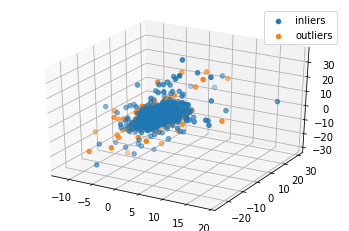

In [ ]:
#Task 5

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

# Load CSV file, set the 'Date' as row's index
stocks = pd.read_csv('stocks.csv', header='infer')
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
#display(stocks)


N,d = stocks.shape
# Compute delta as asked for (percentage of changes in the daily closing price of each stock)
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)

data = delta.values
#print(data)
X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)

from sklearn.svm import OneClassSVM
# Train the one class support vector machine (SVM) model
model = OneClassSVM(nu=0.01,gamma='auto')
yhat = model.fit_predict(X) <0 # Perform fit on input data and returns labels for that input data.
#print(yhat) # Print labels: -1 ('true') for outliers and 1 ('false') for inliers.

#outliers = 0
#inliers = 0
#for i in yhat:
#  if i==True:
#    outliers+=1
#  if i ==False:
#    inliers+=1

#percent = (outliers/(inliers+outliers))*100
#print("percent")
#print(percent)
#print("outliers")
#print(outliers)
#print("inliers")
#print(inliers)

# histogram
from matplotlib import pyplot as plt
import numpy as np

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#type_of = ['outliers','inliers']
#freqs = [np.count_nonzero(yhat == True),np.count_nonzero(yhat == False)]
#ax.bar(type_of,freqs)
#plt.show()

#plt.bar(0, np.count_nonzero(yhat == True))
#plt.bar(1, np.count_nonzero(yhat == False))
#plt.show()


# Select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]

# Summarize the shape of the updated dataset
print(X.shape, y.shape)

points = (0,1,2)
showData = data[:, points]
ax = plt.axes(projection='3d')
ax.scatter3D(*showData[~yhat].T, label='inliers')
ax.scatter3D(*showData[yhat].T, label='outliers')
ax.legend()

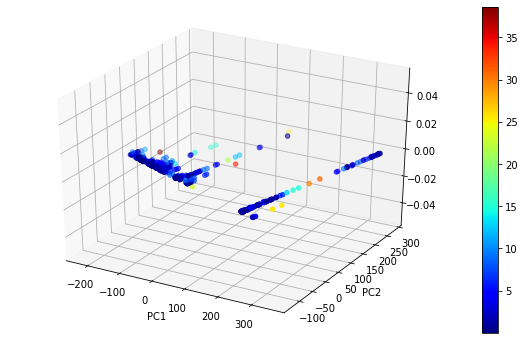

In [ ]:
# Task 6
import matplotlib.pyplot as plt
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
from scipy.spatial import distance
from pandas import read_csv
# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# Extracting the values from the dataframe
data = df.values
#df.head()

#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(df)
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
#print("head")
#print(data_pca.head())
#print("columns")
#print(data_pca.columns)

from sklearn.neighbors import NearestNeighbors
# Implement a k-nearest neighbour approach using k=4 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data_pca.values)
distances, indices = nbrs.kneighbors(data_pca.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(data_pca.PC1,data_pca.PC2,c=outlier_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(p)
plt.show()

In [ ]:
#Task 7
#7a)..

#url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
#html = urlopen(url)

#soup = BeautifulSoup(html, 'lxml')
#print(type(soup))
# Get the title
#title = soup.title
#print(title)
# Print out the text
#text = soup.get_text()
#print(soup.text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'bs4.BeautifulSoup'>
None


ECS766P Data Mining - Week 10
The below table contains income data per country; the same table was used for the Week 3 lab.

Region
Age
Income
Online Shopper


India
49
86400
No


Brazil
32
57600
Yes


USA
35
64800
No


Brazil
43
73200
No


USA
45

Yes


India
40
69600
Yes


Brazil

62400
No


India
53
94800
Yes


USA
55
99600
No


India
42
80400
Yes







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
import requests
import pandas as pd
from bs4 import BeautifulSoup
!pip install requests
!pip install beautifulsoup4

URL = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Income_Table = soup.find("table", {"class": "table table-bordered table-hover table-condensed"})
Table_Headers = []

for header in Income_Table.find_all("th"):
  Table_Headers.append(header.string)
df = pd.DataFrame(columns=Table_Headers)

Regions, Age, Income, OnlineShopper = [],[],[],[]
for row in Income_Table.find_all('tr')[1:]:
  Regions.append(row.find_all('td')[0].string)
  Age.append(row.find_all('td')[1].string)
  Income.append(row.find_all('td')[2].string)
  OnlineShopper.append(row.find_all('td')[3].string)

table_data = {str(Table_Headers[0]): Regions, str(Table_Headers[1]): Age, str(Table_Headers[2]): Income, str(Table_Headers[3]): OnlineShopper}
df = pd.DataFrame(data=table_data)
display(df)

,Region,Age,Income,Online Shopper
0,India,49,86400,No
1,Brazil,32,57600,Yes
2,USA,35,64800,No
3,Brazil,43,73200,No
4,USA,45,None,Yes
5,India,40,69600,Yes
6,Brazil,None,62400,No
7,India,53,94800,Yes
8,USA,55,99600,No
9,India,42,80400,Yes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

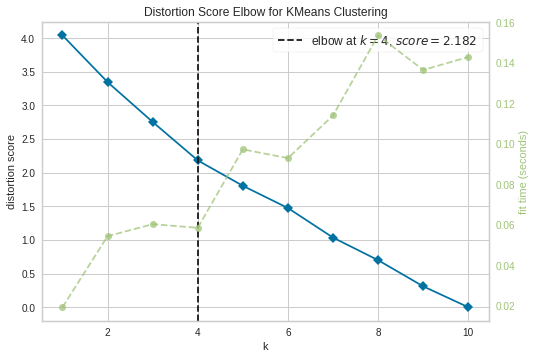

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

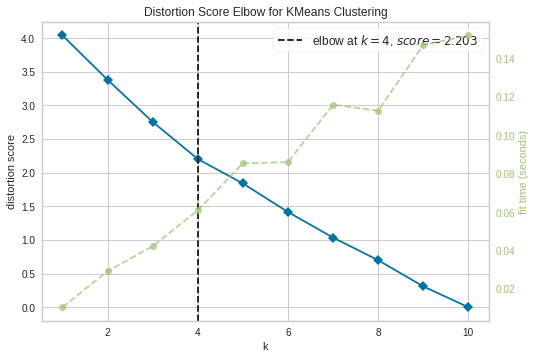

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

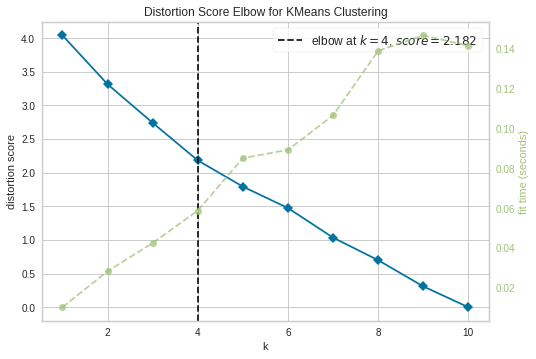

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

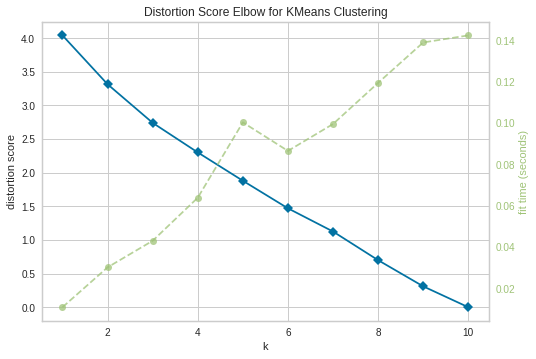

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

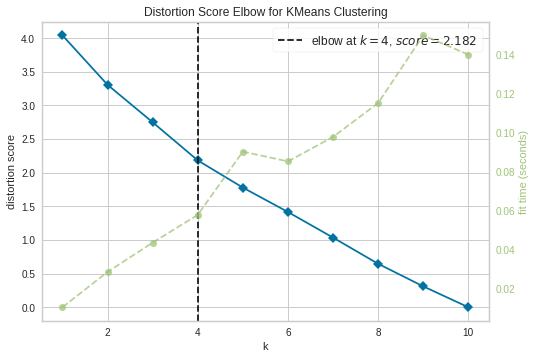

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

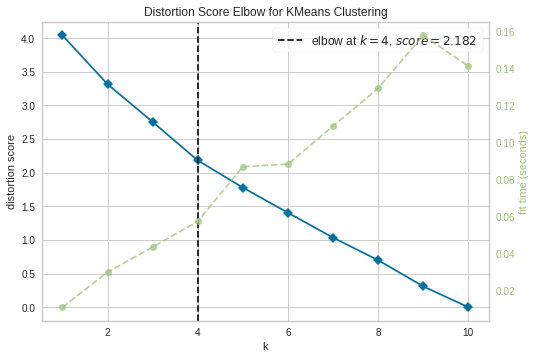

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

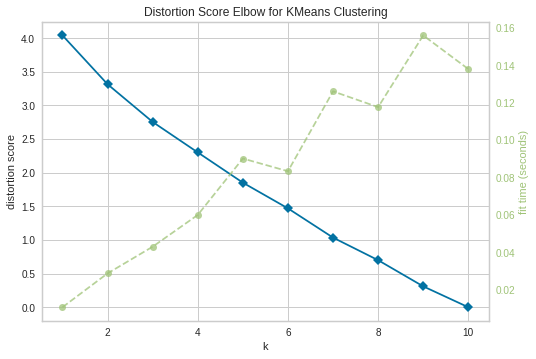

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

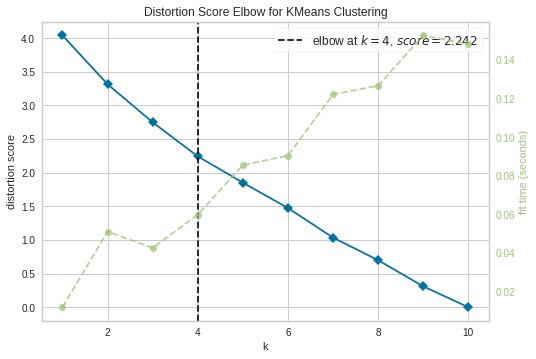

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

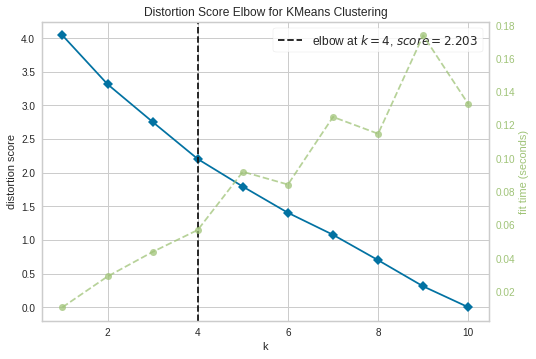

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

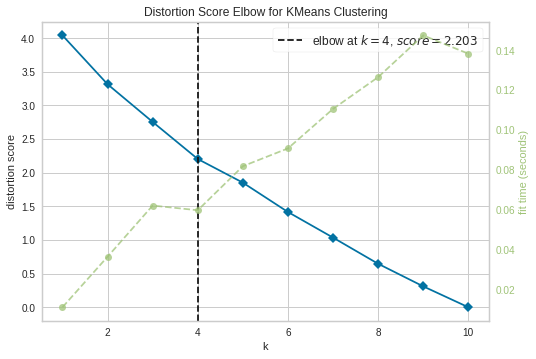

In [ ]:
#Task 8
# Wikipedia has a python library that can be used: https://pypi.org/project/wikipedia/
!pip install wikipedia
import pandas as pd
import wikipedia
import seaborn as sns

articles=['Supervised learning','Unsupervised learning','Semi-supervised learning',
          'Association rule learning','Anomaly detection','Cluster analysis',
          'Dimensionality reduction','Regression analysis',
          'Statistical classification','Data warehouse',
          'Online analytical processing']

list_of_article_contents=[] # this is where pages' content is to be stored
article_titles=[]
for article in articles:
   list_of_article_contents.append(wikipedia.page(article).content)
   article_titles.append(article)

# "Initially, arbitrary vectors µ1,..., µK 2 Rd are chosen as cluster centers" (from data mining lecture 6 slides)
# I create the numeric feature vectors. This is done by using the earlier list made containing article content.
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
A = vec.fit_transform(list_of_article_contents)
# We can see the vectors associated with the articles
#print(A)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
distortion_scores = []
K = range(1,11)
for i in K:
   km = KMeans(n_clusters=i, max_iter=150, n_init=11)
   km = km.fit(A)
   distortion_scores.append(km.inertia_)

# distortion scores per number of clusters
clusters = [1,2,3,4,5,6,7,8,9,10]
sns.scatterplot(x = clusters, y = distortion_scores)
plt.plot(clusters, distortion_scores, '^k:')
plt.xlabel('clusters')
plt.ylabel('distortion_scores')
plt.show()

# I find that the elbow point is when we reach 8 clusters. This is the optimal point.
optimal_clusters = 4
km_model = KMeans(n_clusters=optimal_clusters, max_iter=150, n_init=11)
# fit model to data
km_model.fit(A)
labels=km_model.labels_
labels_list = list(labels)
for i in range(len(article_titles)):
  print(i, "Title: ", article_titles[i], ", K:", labels_list[i])

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km_model, k=(1,11))
visualizer.fit(A)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure